# Data stats and augmentations

In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

# Project
project_common_path = os.path.dirname('.')
project_common_path = os.path.abspath(os.path.join(project_common_path, '..', 'common'))
if not project_common_path in sys.path:
    sys.path.append(project_common_path)

In [168]:
from data_utils import TRAIN_CSV_FILEPATH, TRAIN_CSV, TRAIN_ENC_CSV, get_caption, train_jpg_ids
from image_utils import get_image_data

In [76]:
import matplotlib.pylab as plt
%matplotlib inline

In [169]:
TRAIN_ENC_CSV.head()

,image_name,tags,habitation,road,slash_burn,artisinal_mine,blooming,primary,partly_cloudy,selective_logging,agriculture,bare_ground,conventional_mine,clear,cloudy,blow_down,haze,cultivation,water
0,train_0,haze primary,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,train_1,agriculture clear primary water,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1
2,train_2,clear primary,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,train_3,clear primary,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,train_4,agriculture clear habitation primary road,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0


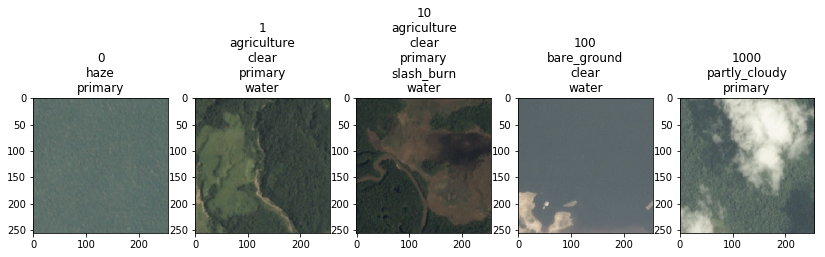

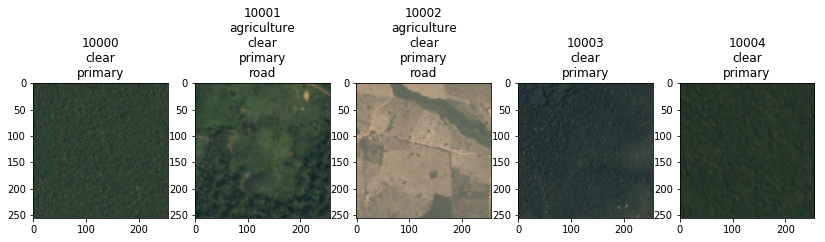

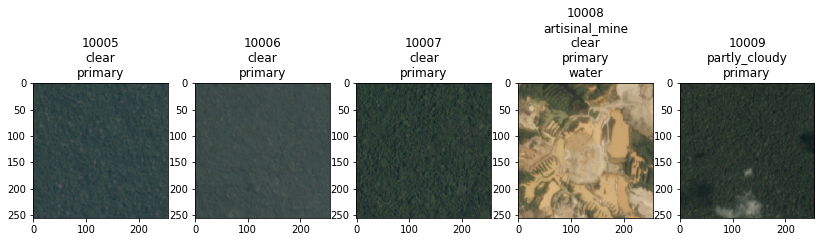

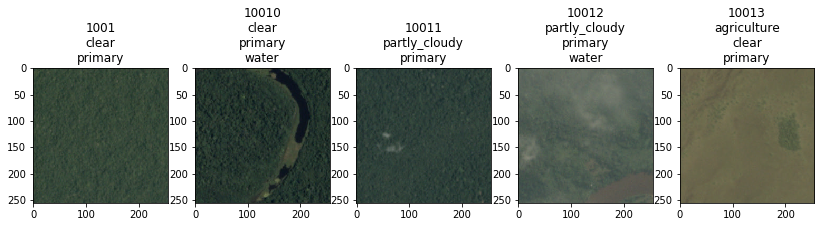

In [159]:
n = 5
counter = 0
for image_id in train_jpg_ids[:20]:
    img = get_image_data(image_id, "Train_jpg")
    caption = get_caption(image_id, "Train_jpg")
    if counter % n == 0:
        plt.figure(figsize=(14, 5))
    plt.subplot(1, n, counter % n + 1)
    plt.imshow(img[:,:,:3])
    plt.title(image_id + "\n" + caption.replace(' ', '\n'))
    counter += 1

## Data augmentation